In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded= files.upload()

Saving water.csv to water.csv


In [3]:
df = pd.read_csv('water.csv')
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [5]:
df.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


## **Задание 1.**
## Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

### **1. Построить точечный график**

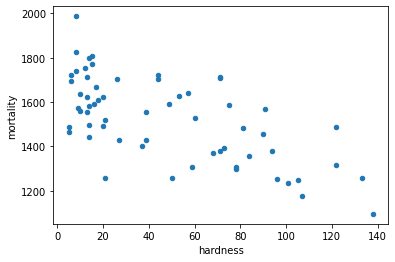

In [6]:
df.plot(kind='scatter', x='hardness', y='mortality')

### **2. Рассчитать коэффициенты корреляции Пирсона и Спирмена**

In [7]:
df.corr() #коэффициент Пирсона

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [8]:
df[['mortality', 'hardness']].corr(method='spearman') #коэффициент Спирмена

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


### По значениям посчитанных коэффициентов видим наличие умеренной отрицательной связи между жескостью воды и смертностью

## **3. Построить модель линейной регрессии**

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
X = df[['hardness']] 
y = df['mortality'] 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) #разделяем данные на две части - для обучения и для проверки

In [12]:
#обучаем нашу модель
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print(model.coef_) #коэффициент перед x

[-3.28281845]


In [14]:
model.intercept_ #независимый член

1683.9212680875548

In [15]:
y_pred = model.predict(X_test) #прогноз на основе данных, которые мы "приберегли" для проверки
y_pred

array([1339.22533049, 1651.09308355, 1637.96180974, 1539.47725614,
       1427.86142873, 1618.26489902, 1247.30641379, 1437.70988409,
       1614.98208057, 1664.22435737, 1490.23497934, 1418.01297337,
       1555.89134841])

## **4. Рассчитать коэффициент детерминации**

In [16]:
model.score(X_test, y_test) #коэффициент детерминации. Похоже получилась модель "средней паршивости" :)

0.5099679408034544

Коэффициент детерминации выше 50%, т.е. наша модель на грани приемлемости )

Text(0.5, 0, 'water hardness')

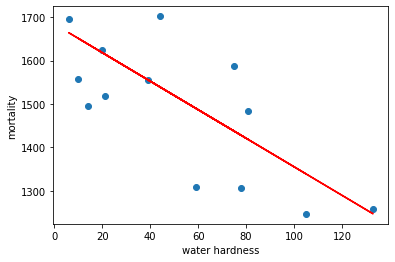

In [17]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.ylabel('mortality')
plt.xlabel('water hardness')

## **5. Вывести график остатков**

Долго думал над остатками и вот что нашел:

Остаток, или оценка ошибки еi, представляет собой разность между наблюдаемым (Yi) и предсказанным (Ŷi) значениями зависимой переменной при заданном значении Xi.

(9) ei = Yi – Ŷi

Для оценки пригодности эмпирической модели регрессии остатки откладываются по вертикальной оси, а значения Xi — по горизонтальной. Если эмпирическая модель пригодна, график не должен иметь ярко выраженной закономерности. Если же модель регрессии не пригодна, на рисунке проявится зависимость между значениями Xi и остатками еi.

https://baguzin.ru/wp/prostaya-linejnaya-regressiya/

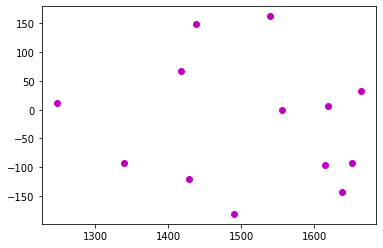

In [18]:
plt.scatter(y_pred, y_test-y_pred, c='m' ) 

Ярко выраженной закономерности на графике я не вижу, значит наверное получившаяся модель вполне себе пригодна.
(Хотя не факт что я правильно построил график остатков)

В общем и целом исходя из полученных результатов делаю вывод о том, что определенно есть умеренная взаимосвязь между жесткостью воды и смертностью в городах Англии.

## **Задание 2.**
## Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?



## 1. Разделить данные на 2 группы
## 2. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

## 2.1 Рассмотрим южные города

In [19]:
df_south = df.loc[df['location'] == 'South'] 
df_south.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73


In [20]:
df_south.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 59
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   26 non-null     object
 1   town       26 non-null     object
 2   mortality  26 non-null     int64 
 3   hardness   26 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.0+ KB


In [21]:
df_south.describe()

,mortality,hardness
count,26.000000,26.000000
mean,1376.807692,69.769231
std,140.269175,40.360682
min,1096.000000,5.000000
25%,1259.250000,40.250000
50%,1364.000000,75.500000
75%,1485.750000,99.750000
max,1627.000000,138.000000


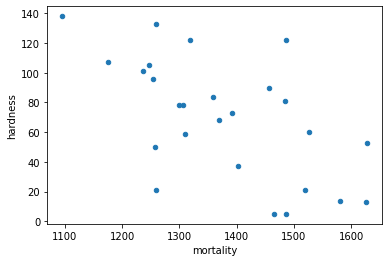

In [22]:
df_south.plot(kind='scatter', x='mortality', y='hardness')

In [23]:
df_south.corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [24]:
df_south.corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


Коэффициенты Пирсона и Спирмена для южных городов еще ниже, чем для общего набора городов, тем не менее умеренная отрицательная связь также есть

In [25]:
X = df_south[['hardness']] 
Y = df_south['mortality'] 

In [26]:
X_train, X_test,y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # разделяем наши данные

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
print(model.coef_)

[-3.07466127]


In [29]:
model.intercept_

1595.4337548999538

In [30]:
y_pred = model.predict(X_test)
y_pred

array([1220.32508018, 1580.06044856, 1272.59432174, 1220.32508018,
       1481.67128798, 1530.86586827])

In [31]:
model.score(X_test, y_test) #коэффициент детерминации для южных городов

-1.9300174406554644

К коэффициенту детерминации в данном случае у меня вопрос. Когда я делаю test_size = 0.2, то получаю отрицательное значение коэффициента детерминации, т.е. ну совсем плохую модель. А когда test_size = 0.1, то все хорошо ) Это потому, что выборка южных городов и так не очень большая, и если взять на обучение 80% данных, то этого слишком мало и модель делает неадекватные прогнозы, которые хуже простого усреднения?

Text(0.5, 0, 'water hardness')

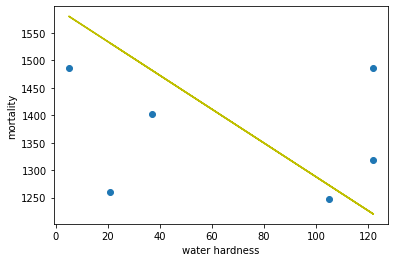

In [32]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='y')
plt.ylabel('mortality')
plt.xlabel('water hardness')

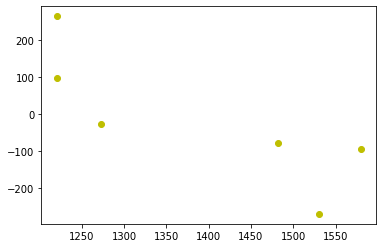

In [33]:
plt.scatter(y_pred, y_test-y_pred, c = 'y') 

## 2.2 Рассмотрим северные города

In [34]:
df_north = df.loc[df['location'] == 'North'] 
df_north.head()

,location,town,mortality,hardness
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15


In [35]:
df_north.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   35 non-null     object
 1   town       35 non-null     object
 2   mortality  35 non-null     int64 
 3   hardness   35 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


In [36]:
df_north.describe()

,mortality,hardness
count,35.000000,35.000000
mean,1633.600000,30.400000
std,136.936911,26.134494
min,1378.000000,6.000000
25%,1557.500000,12.500000
50%,1637.000000,17.000000
75%,1718.000000,44.000000
max,1987.000000,94.000000


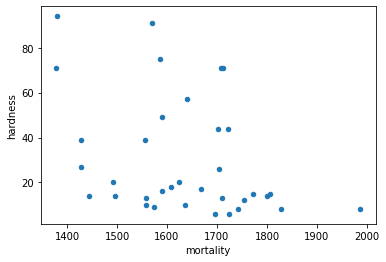

In [37]:
df_north.plot(kind='scatter', x='mortality', y='hardness')

In [38]:
df_north.corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [39]:
df_north.corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


Умеренная отрицательная взаимосвязь между смертностью и жесткостью воды, но уже прям на грани слабой

In [40]:
X = df_north[['hardness']] 
Y = df_north['mortality'] 

In [41]:
X_train, X_test,y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # разделяем наши данные

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
print(model.coef_)
model.intercept_

[-2.25038888]


1694.905301402942

In [44]:
y_pred = model.predict(X_test)
print(y_pred)

[1676.90219034 1674.65180145 1663.39985704 1681.4029681  1658.89907927
 1535.1276907  1595.88819055]


In [45]:
model.score(X_test, y_test) #коэффициент детерминации для северных городов

-0.18101539518829401

Text(0.5, 0, 'water hardness')

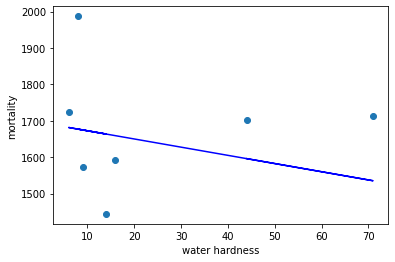

In [46]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='b')
plt.ylabel('mortality')
plt.xlabel('water hardness')

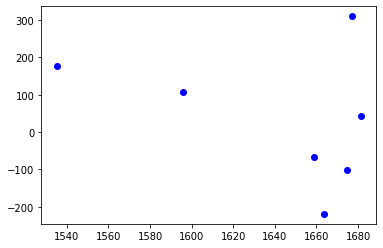

In [47]:
plt.scatter(y_pred, y_test-y_pred, c = 'b') 

**Вывод:**  Зависимость между жесткостью воды и смертностью в общем наборе данных выше, нежели в выборках с южными и северными городами отдельно. В общем случае мы получаем коэффициент детерминации чуть выше 50 процентов и это говорит о приемлемости модели. Если же рассматривать южные и северные города по-раздельности, то связь между жесткостью воды и смертностью выражена еще слабже, чем в общем наборе данных, а модели прогнозирования получаются хуже, чем результаты простого усреднения. Т.е. отвечая на вопрос задачи, аналогичная зависимость не сохраняется.

И здесь меня немного смущает тот факт, что мы из двух выборок со слабой связью между двумя параметрами вдруг получили общую выборку с более выраженной зависимостью между двумя параметрами? Это потому что данные дополнили друг друга (как на графике ниже) и мы получили и более явно "прощупываемую" корреляцию и прогнозировать стали лучше за счет увеличения количества данных? 
Для чего тогда можно использовать подобную модель? Скажем, захотим мы чтобы модель сказала нам какая примерно смертность будет в каком-нибудь другом северном городке с известным значением жесткости воды. И модель даст нам прогноз. Не попадем ли мы пальцем в небо с таким прогнозом, ведь мы явно видим, что корреляция внутри выборки по северным городам меньше, чем в общей выборке?


Text(0, 0.5, 'mortality')

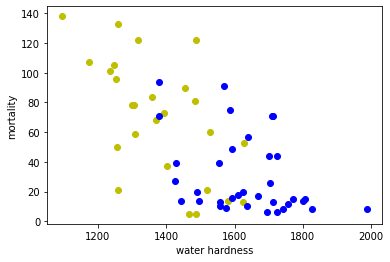

In [48]:
plt.scatter(df_south['mortality'], df_south['hardness'], color = 'y')
plt.scatter(df_north['mortality'], df_north['hardness'], color = 'b')
plt.xlabel('water hardness')
plt.ylabel('mortality')